In [1]:
import glob
import numpy as np 
from astropy.io import fits
from RetrieveSource import *
from EstimateBackground import *
from TractorTools import *
from Heasarc import *
from PSF import *

/home/bethany/anaconda3/lib/python3.7/site-packages/SecretStorage-2.3.1-py3.7.egg/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
/home/bethany/anaconda3/lib/python3.7/site-packages/SecretStorage-2.3.1-py3.7.egg/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead


In [2]:
file_location = '/media/bethany/Seagate Portable Drive/SwiftData/Astrometry/SMC/sw00040415001um2_sk_40415_1_1'
HDR = fits.open(file_location+'.new')
CAT = file_location+'.full.dat'
uvfilter='UVM2'

In [3]:
# Step 1: Get Zaritsky Coordinates and Catalog 
shape = np.shape(HDR[0].data)

print('---Getting Catalog---')

meta = get_meta().with_hdu(HDR[0],
                           optical_catalog=CAT,
                           xdim=[0,shape[1]],
                           ydim=[0,shape[0]])

---Getting Catalog---


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 55466.000949 from DATE-OBS.
Set MJD-END to 55466.003194 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 55466.000949 from DATE-OBS.
Set MJD-END to 55466.003194 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 55466.000949 from DATE-OBS.
Set MJD-END to 55466.003194 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 55466.000949 from DATE-OBS.
Set MJD-END to 55466.003194 from DATE-END'. [astropy.wcs.wcs]


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


In [4]:
shape

(1312, 1299)

In [25]:
x1,y1 = meta.pixel_positions
cut = 62

x = x1[meta.source_intensities > cut]
y = y1[meta.source_intensities > cut]
r = meta.catalog.Ra[meta.source_intensities > cut]
d = meta.catalog.Dec[meta.source_intensities > cut]

meta.source_intensities[meta.source_intensities > cut]

array([62.36612694, 72.58097303, 88.8147902 , 69.16935358])

In [26]:
[print((r,d)) for r,d in zip(r.values,d.values)]

(14.836395, -72.28605999999999)
(15.185415, -72.39853000000001)
(15.289245, -72.45789)
(15.372915, -72.38882)


[None, None, None, None]

In [27]:
# Maria's picks

ra = [15.185178,15.372773,15.289367,15.183079]
dec = [-72.3985,-72.388778, -72.457835,-72.434774]

from astropy.coordinates import SkyCoord 
import astropy.units as u
from astropy.wcs import WCS

XX,YY = SkyCoord(ra,dec,unit=u.deg).to_pixel(WCS(HDR[0].header))

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 55466.000949 from DATE-OBS.
Set MJD-END to 55466.003194 from DATE-END'. [astropy.wcs.wcs]


In [28]:
YY

array([644.16832925, 677.96589279, 430.90233418, 514.12001666])

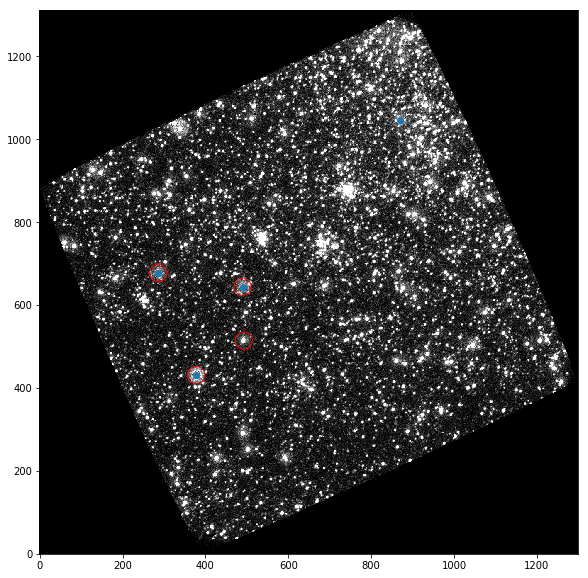

In [29]:
plt.figure(figsize=(10,10))

plt.imshow(HDR[0].data,origin='lower',vmin=0,vmax=10,cmap="Greys_r")
plt.scatter(x,y)
plt.scatter(XX,YY, facecolors='none', edgecolors='r',s=300)
#plt.scatter(x1,y1,c='purple',s=5)
#plt.ylim(900,1100)
#plt.xlim(200,500)